In [357]:
## Step1 - Read and Understand the Data

In [358]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [359]:
# Read the day.csv file

df = pd.read_csv('day.csv')

In [360]:
# Display the head of the data frame
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [361]:
# Describe the csv file output
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [362]:
# Display the shape of the data frame
df.shape

(730, 16)

In [363]:
# Display the column info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [364]:
# Get the null valued columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [365]:
# none of the columns are having null values


In [366]:
# Renaming some of the columns for better readability
df.rename(columns={'hum':'humidity', 'yr':'year', 'mnth':'month','dteday':'dateday'}, inplace=True)

In [367]:
df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [368]:
df.shape

(730, 16)

In [369]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [370]:
df.shape

(730, 16)

In [371]:
# The shape of the data frame is same after dropping the duplicates which implies there are no duplicates

In [372]:
# Now, we can remove the columns which doesn't provide any value for the analysis
# 'instant' column has only index for the row and can be removed
# 'cnt' column covers both the 'casual' and 'registered' columns and hence 'casual' and 'registered' columns
# can be removed
# 'dateday' column can also be removed as 'year' and 'month' column covers it's usage

df.drop(['instant','dateday','casual','registered'],axis=1,inplace=True)

In [373]:
# Now, as per the Data dictionary we have to encode/map certain column values
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [374]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'})

In [375]:
# Encoding/mapping the month column
df.month = df.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [376]:
# Encoding/mapping the weathershit column
df.weathersit = df.weathersit.map({1:'Clear', 2:'Misty', 3:'Light_snowrain', 4:'Heavy_snowrain'})

In [377]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [379]:
## Step 2: Visualising the data


<Axes: xlabel='workingday', ylabel='cnt'>

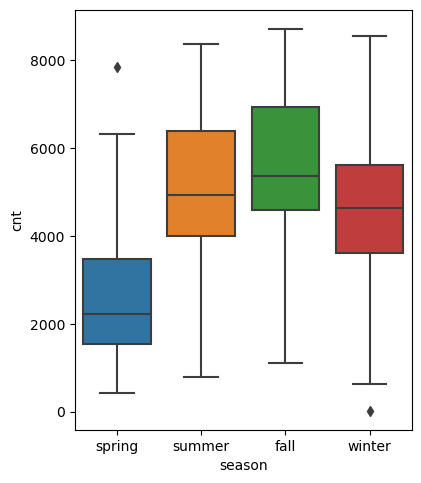

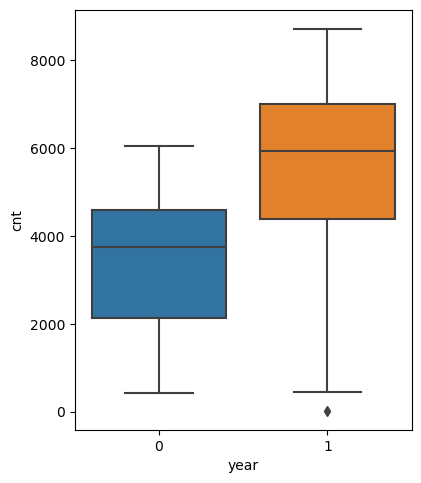

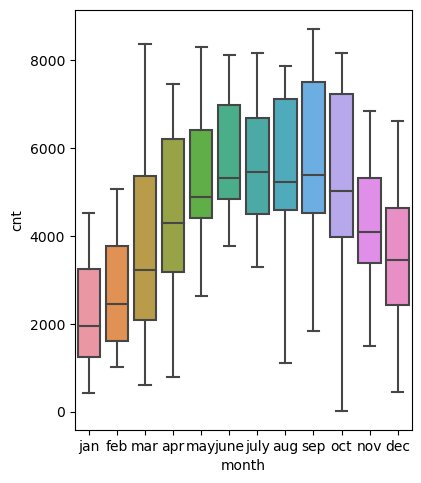

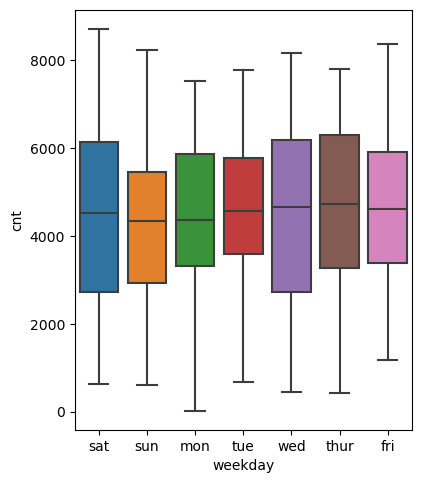

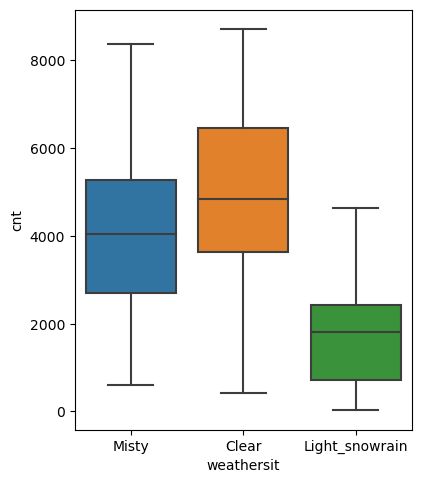

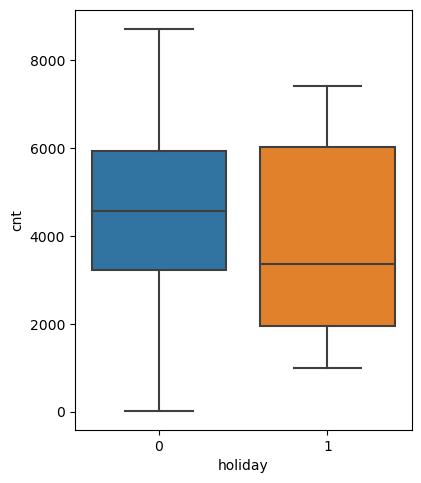

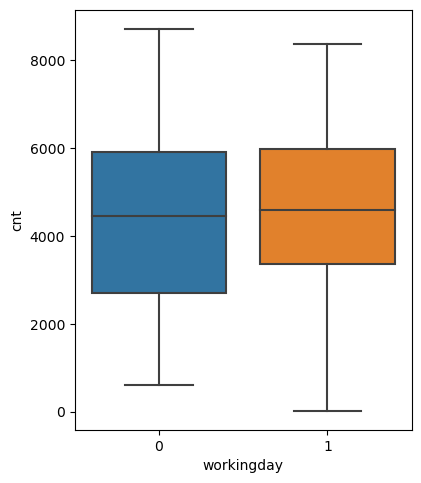

In [380]:
# First let's see how the predictor variables stands against the target variable
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data =df)

plt.figure(figsize=(20,12))
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data =df)

plt.figure(figsize=(20,12))
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data =df)

plt.figure(figsize=(20,12))
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data =df)

plt.figure(figsize=(20,12))
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data =df)

plt.figure(figsize=(20,12))
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data =df)

plt.figure(figsize=(20,12))
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data =df)

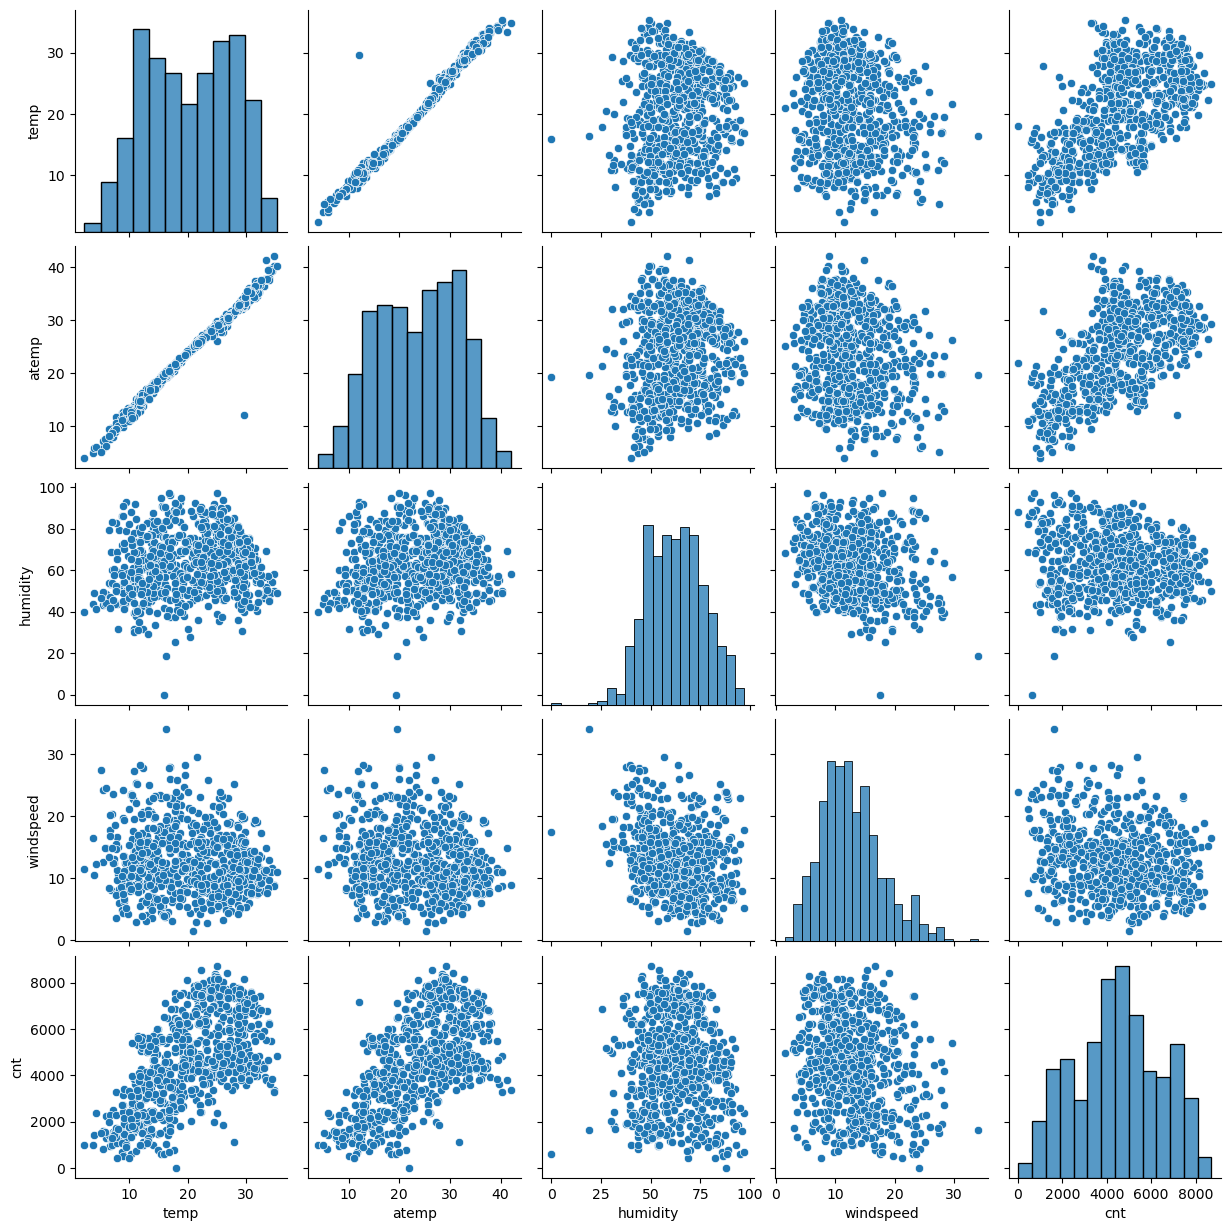

In [381]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

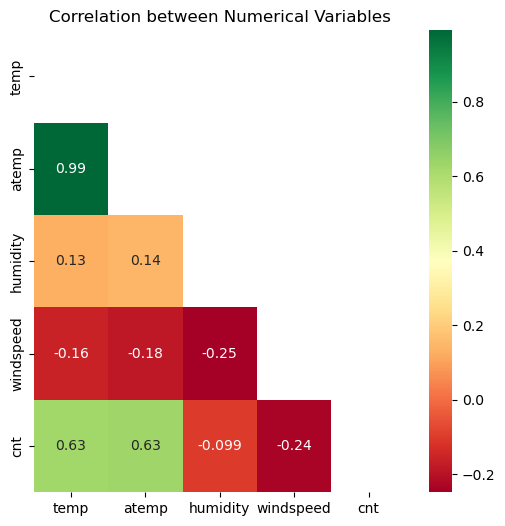

In [382]:
# Checking the correlation between the various numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [383]:
# From the above diagram it's clear that there is a linear relationship between temp and atemp. Due to multicollinearity
# both of these parameters cannot be used in the model.

In [384]:
# Step 3- Data Preparation


In [385]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [386]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [387]:
# Merging the dummy varaibles with the dataframe

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df], axis=1)

In [388]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thur,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [389]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [390]:
# Dropping the columns for which dummy variables are created

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [391]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [392]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

In [393]:
# Step 4 - Splitting the Data into Training and Testing Sets

In [394]:
# Splitting the data frame into training and testing sets in 70-30% ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [395]:
df_train.shape

(510, 30)

In [396]:
df_test.shape

(220, 30)

In [397]:
# Rescaling the features using MinMaxScaler 

scaler = MinMaxScaler()

In [398]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [399]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [400]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [401]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


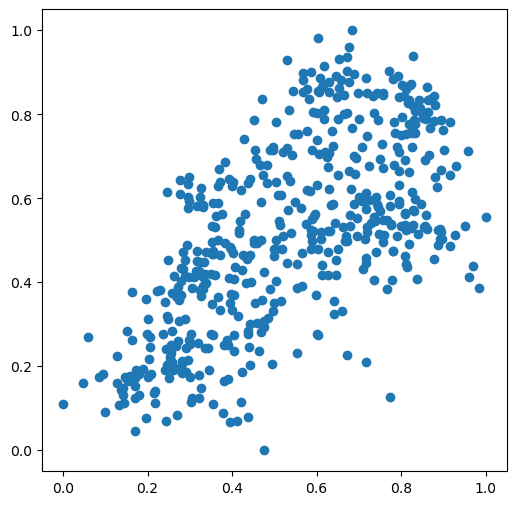

In [402]:
# Checking temp vs cnt correlation

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [403]:
# From the above correlation map it's clear that temp and cnt are positively correlated

In [404]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [405]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [406]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 12),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [407]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [408]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thur', 'tue', 'wed'],
      dtype='object')

In [409]:
# Generic function to calculate Variance Inflation Factor(VIF) of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [410]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [411]:
# calculate VIF

X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)
X_train_rfe = X_train_rfe.astype(float)
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Misty,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


In [412]:
# Step 5- Building a linear model

In [413]:
# We can build n-linear regresssion model to better find the relation between the variables
# # Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        13:29:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2832      0.034      8.

In [414]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,summer,2.24
10,spring,2.13
0,year,2.07
12,winter,1.84
4,july,1.59
9,Misty,1.56
5,sep,1.34
6,sat,1.23


In [415]:
# VIF values seems to be good now. But we will see if we can reduce further ?

In [416]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.28e-188
Time:                        13:29:48   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2037      0.029      6.

In [417]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,year,2.07
11,winter,1.81
4,july,1.59
8,Misty,1.56
5,sep,1.34
6,sun,1.18


In [418]:
# VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [419]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.45e-189
Time:                        13:29:49   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2060      0.029      7.

In [420]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


In [421]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          3.23e-189
Time:                        13:29:49   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

In [422]:
# We can drop spring variable as it has high p-value
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,year,2.00
8,summer,1.57
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


In [423]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          6.34e-189
Time:                        13:29:49   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1344      0.017      8.

In [424]:
# Note:
# We can cosider the above model i.e lr_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
# F-Statistics value of 255.0 (which is greater than 1) and the p-value of 6.34e-189 i.e almost equals to zero, states that the overall model is significant

In [425]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.134431
year              0.232752
holiday          -0.106683
temp              0.547114
windspeed        -0.153073
sep               0.099353
sun              -0.049842
Light_snowrain   -0.288321
Misty            -0.080555
summer            0.087801
winter            0.131138
dtype: float64

In [426]:
# Step 6: Residual Analysis of the train data and validation

In [427]:
X_train_lm_5

,const,year,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,summer,winter
576,1.0,1.0,0.0,0.815169,0.264686,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.442393,0.255342,0.0,0.0,0.0,1.0,0.0,0.0
728,1.0,1.0,0.0,0.245101,0.663106,0.0,1.0,0.0,0.0,0.0,0.0
482,1.0,1.0,0.0,0.395666,0.188475,0.0,0.0,0.0,1.0,1.0,0.0
111,1.0,0.0,0.0,0.345824,0.380981,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,0.863973,0.187140,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.202618,0.111379,0.0,0.0,0.0,0.0,0.0,0.0
350,1.0,0.0,0.0,0.248216,0.431816,0.0,0.0,0.0,1.0,0.0,1.0
79,1.0,0.0,0.0,0.462664,0.529881,0.0,0.0,0.0,1.0,1.0,0.0


In [428]:
y_train_pred = lr_5.predict(X_train_lm_5)

In [429]:
# Error plot

Text(0.5, 0, 'Errors')

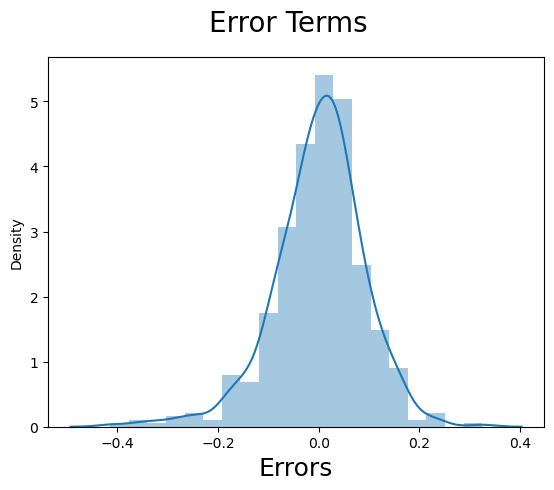

In [430]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [431]:
# Error terms are following normal distribution

In [432]:
# Multi Colinearity

In [433]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,year,2.00
8,summer,1.57
7,Misty,1.48
9,winter,1.39
4,sep,1.21
5,sun,1.17
6,Light_snowrain,1.08
1,holiday,1.04


In [434]:
# VIF values are less than 5 which is good

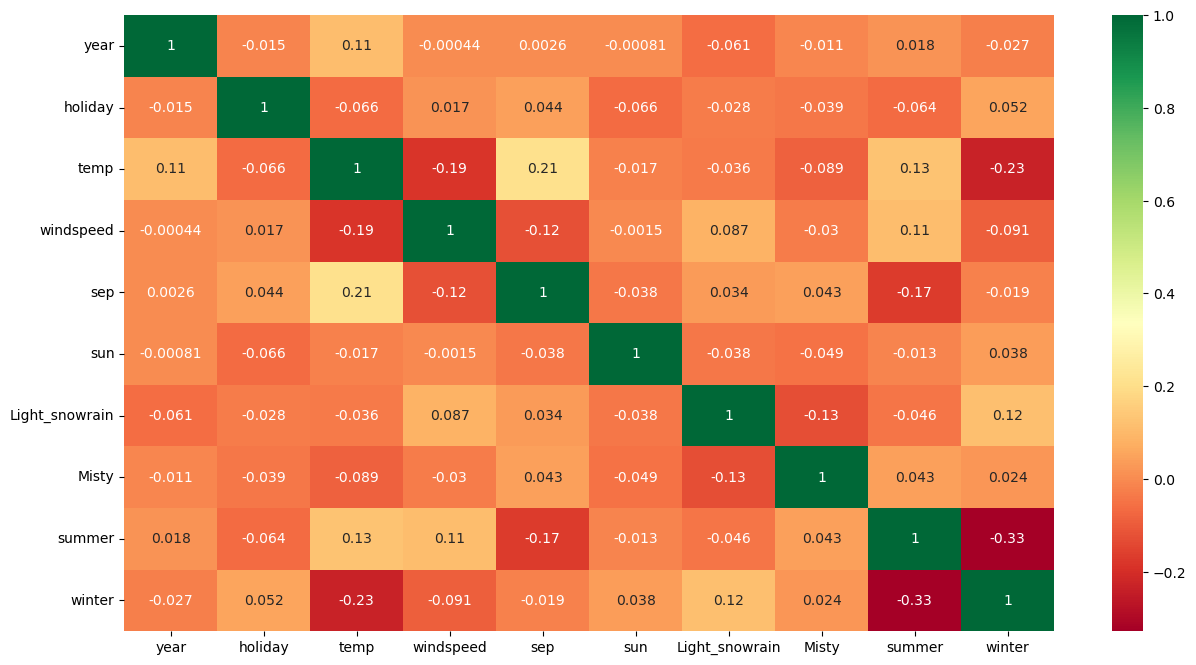

In [435]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [436]:
# There is no multicollinearity as seen from the above heatmap

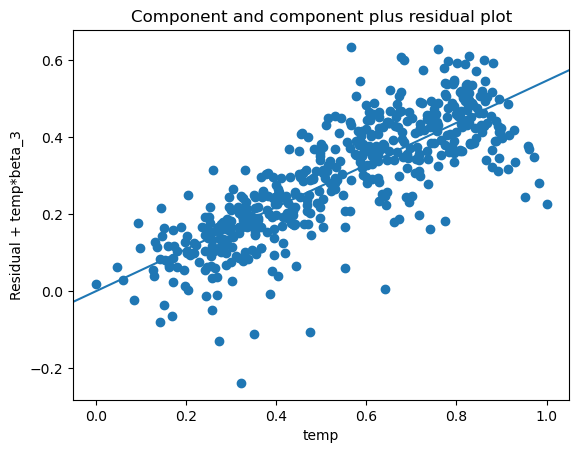

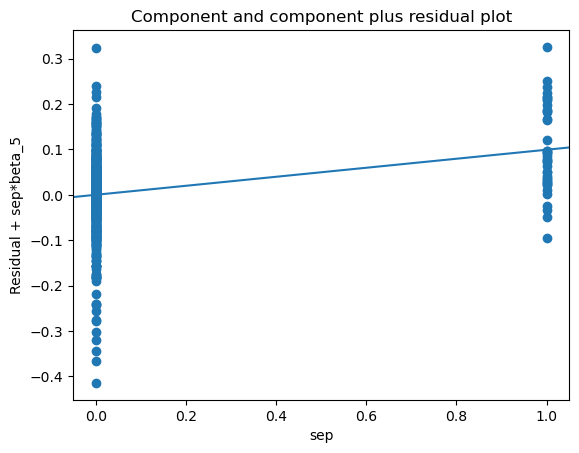

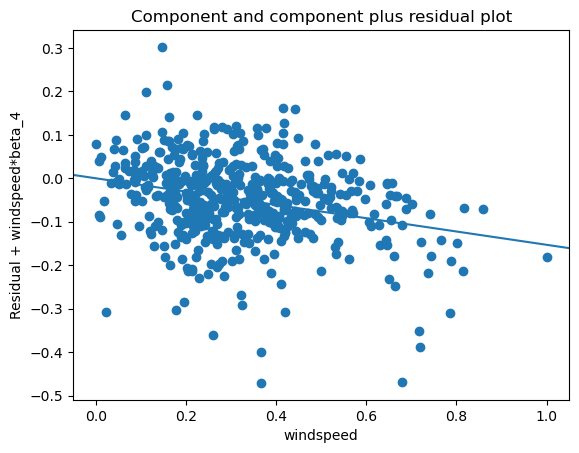

In [437]:
# Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

In [438]:
# Clearly from the above visualizations linearity can be observed easily

In [439]:
## Step 7: Making Predictions Using the Final Model

In [440]:
# Now that we have fitted the model and checked the normality of error terms, 
# it's time to go ahead and make predictions using the final, i.e. 5th model.

In [441]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thur,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [442]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [443]:
y_test = df_test.pop('cnt')
X_test = df_test

In [444]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [445]:
y_pred = lr_5.predict(X_test_lm_5)

In [446]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7965

In [447]:
## Step 8: Model Evaluation

In [448]:
# Plotting actual vs predicted values

Text(0, 0.5, 'y_pred')

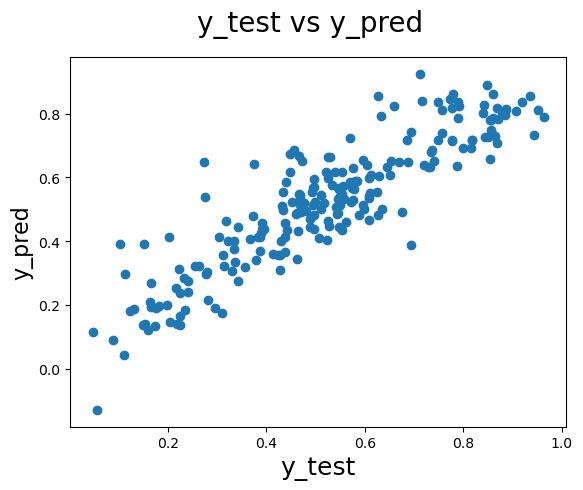

In [449]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [450]:
round(lr_5.params,4)

const             0.1344
year              0.2328
holiday          -0.1067
temp              0.5471
windspeed        -0.1531
sep               0.0994
sun              -0.0498
Light_snowrain   -0.2883
Misty            -0.0806
summer            0.0878
winter            0.1311
dtype: float64

In [451]:
# So, the multi linear regression will be
# cnt = 0.1344 + 0.2328 x year -0.1067 x holiday + 0.5471 x temp - 0.1531 x windspeed + 0.0994 x sep - 0.0498 x sun - 0.2883 x Light_snowrain - 0.0806 x Misty + 0.0878 x summer + 0.1311 x winter

In [452]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7868


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

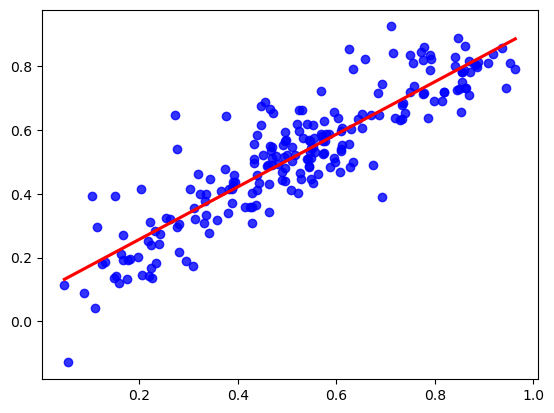

In [453]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [454]:
# Comparision between Training and Testing dataset:
# - Train dataset R^2          : 0.836
# - Test dataset R^2           : 0.7965
# - Train dataset Adjusted R^2 : 0.833
# - Test dataset Adjusted R^2  : 0.7868
# Demand of bikes depend on year, holiday, temp, windspeed, sep, sun, Light_snowrain, Misty, summer and winter.